Import all the necessary libraries

In [1]:
import pandas as pd 
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt 
import seaborn as sns 

# Add color to seaborn plots
sns.set(color_codes = True)

from google.colab import drive
from os import listdir
from os.path import isfile, join

from skimage.feature import local_binary_pattern
from skimage.io import imread,imshow 
from skimage.color import rgb2gray
from sklearn.metrics import classification_report
from skimage.filters import prewitt_h, prewitt_v
from skimage.transform import resize 

# Supervised machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Connect the notebook to the drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


Read in the pizza images

In [3]:
!ls '/content/drive/MyDrive/pizza/pizza'

1001116.jpg  1625147.jpg  2236338.jpg  2821034.jpg  3484590.jpg  568995.jpg
1008104.jpg  163039.jpg   2236914.jpg  2821048.jpg  3486640.jpg  573054.jpg
1008144.jpg  1633289.jpg  2241448.jpg  2827154.jpg  3493457.jpg  576236.jpg
1008844.jpg  1635386.jpg  2242047.jpg  2827938.jpg  3497151.jpg  5764.jpg
1008941.jpg  1636299.jpg  2247711.jpg  2831983.jpg  349946.jpg	 579691.jpg
1011404.jpg  1636919.jpg  22489.jpg    2841536.jpg  350358.jpg	 593400.jpg
102037.jpg   1638227.jpg  2250611.jpg  2844278.jpg  3505182.jpg  59445.jpg
1026922.jpg  1646974.jpg  2253670.jpg  2849924.jpg  3512070.jpg  596494.jpg
1029698.jpg  1649108.jpg  2255361.jpg  2852301.jpg  3514408.jpg  598381.jpg
1032754.jpg  1649276.jpg  226472.jpg   2855844.jpg  352051.jpg	 604977.jpg
1033251.jpg  1652943.jpg  2265512.jpg  287000.jpg   3530210.jpg  608085.jpg
1035854.jpg  1654444.jpg  2274117.jpg  2870405.jpg  3536393.jpg  614236.jpg
103708.jpg   1655630.jpg  2276783.jpg  2871261.jpg  3546278.jpg  614981.jpg
1038357.jpg  16604

In [4]:
my_path = '/content/drive/MyDrive/pizza/pizza'

pizza_image_files = [f for f in listdir(my_path) if isfile(join(my_path,f))]

In [5]:
pizza_image_files

['1035854.jpg',
 '1038357.jpg',
 '1008104.jpg',
 '1029698.jpg',
 '102037.jpg',
 '1033251.jpg',
 '1008941.jpg',
 '1008844.jpg',
 '1040878.jpg',
 '1001116.jpg',
 '1032754.jpg',
 '1044524.jpg',
 '1011404.jpg',
 '103708.jpg',
 '1026922.jpg',
 '1008144.jpg',
 '1138936.jpg',
 '2005870.jpg',
 '1594097.jpg',
 '2241448.jpg',
 '1944600.jpg',
 '2112757.jpg',
 '2517724.jpg',
 '1336882.jpg',
 '1983369.jpg',
 '2487039.jpg',
 '1180273.jpg',
 '2097315.jpg',
 '2077999.jpg',
 '2570329.jpg',
 '1951130.jpg',
 '1110966.jpg',
 '1390308.jpg',
 '2441328.jpg',
 '1660415.jpg',
 '1765727.jpg',
 '1106738.jpg',
 '1503858.jpg',
 '2231356.jpg',
 '1248346.jpg',
 '1060407.jpg',
 '2091857.jpg',
 '1988629.jpg',
 '1895182.jpg',
 '1670471.jpg',
 '2292986.jpg',
 '2421445.jpg',
 '2508157.jpg',
 '1284978.jpg',
 '2217956.jpg',
 '1507039.jpg',
 '2190018.jpg',
 '1535273.jpg',
 '131561.jpg',
 '1524655.jpg',
 '1763205.jpg',
 '1459760.jpg',
 '1247645.jpg',
 '2293453.jpg',
 '139952.jpg',
 '2451169.jpg',
 '1044789.jpg',
 '2406842.jp

In [6]:
pizza_image = {'Category': [],
              'Image_Name': []
              }

In [7]:
for x in pizza_image_files:
  pizza_image['Image_Name'].append(my_path + '/' + x)
  pizza_image['Category'].append('pizza')

In [8]:
pizza_df = pd.DataFrame(pizza_image)

pizza_df

,Category,Image_Name
0,pizza,/content/drive/MyDrive/pizza/pizza/1035854.jpg
1,pizza,/content/drive/MyDrive/pizza/pizza/1038357.jpg
2,pizza,/content/drive/MyDrive/pizza/pizza/1008104.jpg
3,pizza,/content/drive/MyDrive/pizza/pizza/1029698.jpg
4,pizza,/content/drive/MyDrive/pizza/pizza/102037.jpg
...,...,...
978,pizza,/content/drive/MyDrive/pizza/pizza/863509.jpg
979,pizza,/content/drive/MyDrive/pizza/pizza/816729.jpg
980,pizza,/content/drive/MyDrive/pizza/pizza/809024.jpg
981,pizza,/content/drive/MyDrive/pizza/pizza/868789.jpg


Reading in not-pizza images

In [9]:
!ls '/content/drive/MyDrive/pizza/not_pizza'

1005746.jpg  1628981.jpg  2219905.jpg  2839865.jpg  3480087.jpg  598626.jpg
1009225.jpg  163078.jpg   2221354.jpg  2848506.jpg  3482096.jpg  604483.jpg
1012312.jpg  1631187.jpg  2225413.jpg  2854822.jpg  3491258.jpg  60742.jpg
1018802.jpg  1632190.jpg  2227052.jpg  2858555.jpg  3492040.jpg  609341.jpg
1020735.jpg  163262.jpg   2231095.jpg  2859270.jpg  3492341.jpg  609637.jpg
1027142.jpg  1633423.jpg  2231904.jpg  2859885.jpg  349267.jpg	 612089.jpg
102839.jpg   1634708.jpg  2237864.jpg  2862562.jpg  3496014.jpg  612988.jpg
1043233.jpg  1636841.jpg  2244875.jpg  2862612.jpg  3501089.jpg  615481.jpg
1045400.jpg  1640708.jpg  2246919.jpg  2865614.jpg  3503609.jpg  616584.jpg
104773.jpg   1641476.jpg  225862.jpg   2869264.jpg  351082.jpg	 625080.jpg
1050956.jpg  1644985.jpg  2264579.jpg  2875122.jpg  351197.jpg	 625847.jpg
1054362.jpg  1645015.jpg  2264940.jpg  2875742.jpg  3513048.jpg  626750.jpg
1062097.jpg  1647019.jpg  2268306.jpg  2877643.jpg  3516800.jpg  635615.jpg
1066151.jpg  164

In [10]:
my_path = '/content/drive/MyDrive/pizza/not_pizza'

not_pizza_image_files = [f for f in listdir(my_path) if isfile(join(my_path,f))]

In [11]:
not_pizza_image_files

['1345866.jpg',
 '1250025.jpg',
 '1226137.jpg',
 '1349179.jpg',
 '123902.jpg',
 '114483.jpg',
 '1189793.jpg',
 '1228631.jpg',
 '1248568.jpg',
 '137787.jpg',
 '1309938.jpg',
 '1027142.jpg',
 '1221380.jpg',
 '1054362.jpg',
 '1018802.jpg',
 '1005746.jpg',
 '113375.jpg',
 '1225708.jpg',
 '1285111.jpg',
 '138753.jpg',
 '1183445.jpg',
 '1252840.jpg',
 '1050956.jpg',
 '1260663.jpg',
 '1332214.jpg',
 '1244695.jpg',
 '1114354.jpg',
 '1100403.jpg',
 '1247622.jpg',
 '1227349.jpg',
 '117282.jpg',
 '1130533.jpg',
 '1088005.jpg',
 '1220269.jpg',
 '131435.jpg',
 '127492.jpg',
 '1070867.jpg',
 '1307078.jpg',
 '1340802.jpg',
 '1165123.jpg',
 '1352761.jpg',
 '1227358.jpg',
 '133092.jpg',
 '1155798.jpg',
 '138090.jpg',
 '1308206.jpg',
 '1180225.jpg',
 '1349536.jpg',
 '1284230.jpg',
 '1125094.jpg',
 '1121757.jpg',
 '1380790.jpg',
 '1342158.jpg',
 '1138747.jpg',
 '1170730.jpg',
 '1150857.jpg',
 '1330725.jpg',
 '1097999.jpg',
 '1259236.jpg',
 '1009225.jpg',
 '1103380.jpg',
 '1045400.jpg',
 '1175395.jpg',
 '

In [12]:
not_pizza_image = {'Category': [],
              'Image_Name': []
              }

In [13]:
for x in not_pizza_image_files:
  not_pizza_image['Image_Name'].append(my_path + '/' + x)
  not_pizza_image['Category'].append('not pizza')

In [14]:
not_pizza_df = pd.DataFrame(not_pizza_image)

not_pizza_df

,Category,Image_Name
0,not pizza,/content/drive/MyDrive/pizza/not_pizza/1345866...
1,not pizza,/content/drive/MyDrive/pizza/not_pizza/1250025...
2,not pizza,/content/drive/MyDrive/pizza/not_pizza/1226137...
3,not pizza,/content/drive/MyDrive/pizza/not_pizza/1349179...
4,not pizza,/content/drive/MyDrive/pizza/not_pizza/123902.jpg
...,...,...
978,not pizza,/content/drive/MyDrive/pizza/not_pizza/656465.jpg
979,not pizza,/content/drive/MyDrive/pizza/not_pizza/92031.jpg
980,not pizza,/content/drive/MyDrive/pizza/not_pizza/3781924...
981,not pizza,/content/drive/MyDrive/pizza/not_pizza/756214.jpg


Combine the pizza and not_pizza dataframe

In [15]:
pizza = pd.concat([pizza_df, not_pizza_df], ignore_index= True)
pizza

,Category,Image_Name
0,pizza,/content/drive/MyDrive/pizza/pizza/1035854.jpg
1,pizza,/content/drive/MyDrive/pizza/pizza/1038357.jpg
2,pizza,/content/drive/MyDrive/pizza/pizza/1008104.jpg
3,pizza,/content/drive/MyDrive/pizza/pizza/1029698.jpg
4,pizza,/content/drive/MyDrive/pizza/pizza/102037.jpg
...,...,...
1961,not pizza,/content/drive/MyDrive/pizza/not_pizza/656465.jpg
1962,not pizza,/content/drive/MyDrive/pizza/not_pizza/92031.jpg
1963,not pizza,/content/drive/MyDrive/pizza/not_pizza/3781924...
1964,not pizza,/content/drive/MyDrive/pizza/not_pizza/756214.jpg


Check how many datapoints each class has

In [16]:
pizza['Category'].value_counts()

pizza        983
not pizza    983
Name: Category, dtype: int64

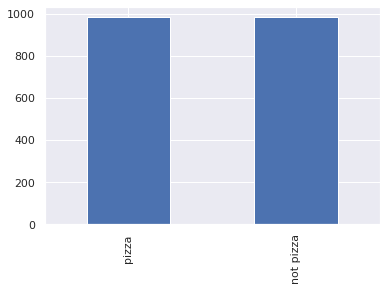

In [17]:
pizza['Category'].value_counts().plot(kind='bar')

In [19]:
from sklearn.metrics import accuracy_score

all_features = []

image_list = pizza['Image_Name'].tolist()

image_list

#type of lbp
METHOD = 'uniform'
radius = 1
n_points = 8 * radius 

#create list for all features
count = 0 

for i in image_list:
  count += 1

  print(count, end=' ')

  image_path = i 

  image = imread(image_path)

  image = resize(image, (100,100))

  #first find the sum
  rgb_feature_matrix = image[:,:,0] +  image[:,:,1] +  image[:,:,2] 

  rgb_feature_matrix = rgb_feature_matrix / 3

  rgb_features = np.reshape(rgb_feature_matrix, (100 * 100))

  #lbp feature extraction
  gray_image = rgb2gray(image)

  lbp_image = local_binary_pattern(gray_image, n_points, radius, METHOD)

  lbp_features = np.reshape(lbp_image, (100 * 100)) 

  #horizontal and vertical edges

  vertical_edges = prewitt_v(gray_image)
  vertical_edges = np.reshape(vertical_edges, (100 * 100))

  horizontal_edges = prewitt_h(gray_image)
  horizontal_edges = np.reshape(horizontal_edges, (100 * 100))

  all_features.append(np.concatenate( (rgb_features, lbp_features, horizontal_edges, vertical_edges )))

all_features = np.array(all_features)

X = all_features

y = pizza['Category'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

#SVM
linear = svm.SVC(kernel='linear').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf').fit(X_train, y_train)
poly= svm.SVC(kernel='poly').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid').fit(X_train, y_train)

#final - cross validation
cv = KFold(n_splits=5, random_state=1, shuffle=True)

scores = cross_val_score(linear, X_train, y_train, scoring='accuracy', cv=cv)
print(f'linear Svm CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')
  
scores = cross_val_score(rbf, X_train, y_train, scoring='accuracy', cv=cv)
print(f'RBF Svm CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

scores = cross_val_score(poly, X_train, y_train, scoring='accuracy', cv=cv)
print(f'Poly Svm CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')
  
scores = cross_val_score(sig, X_train, y_train, scoring='accuracy', cv=cv)
print(f'Sig Svm CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

scores = cross_val_score(dt, X_train, y_train, scoring='accuracy', cv=cv)
print(f'dt CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')
  
scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=cv)
print(f'knn CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

scores = cross_val_score(gnb, X_train, y_train, scoring='accuracy', cv=cv)
print(f'GNB CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

  
scores = cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv=cv)
print(f'RFC CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')

scores = cross_val_score(logReg, X_train, y_train, scoring='accuracy', cv=cv)
print(f'LogReg CV Accuracy:  {round(mean(scores)*100,2), round(std(scores) * 100,2)} ')
print()

linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

dt_pred = dt.predict(X_test)
knn_y_pred = knn.predict(X_test)
gnb_pred = gnb.predict(X_test)
logReg_pred = logReg.predict(X_test)
rfc_pred = rfc.predict(X_test)

# retrieve the accuracy and print it for all 4 kernel functions
print('VARIOUS SVM')
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)

print()
print(f'Accuracy Linear Kernel: {accuracy_lin * 100}')
print(f'Accuracy Polynomial Kernel: {accuracy_poly * 100}')
print(f'Accuracy Radial Basis Kernel: {accuracy_rbf * 100}')
print(f'Accuracy Sigmoid Kernel: {accuracy_sig * 100}')

print(f'Classification Report for Log Reg')
print(classification_report(y_test, logReg_pred))
print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  logReg_pred)*100,2)}')

print(f'Classification Report for Linear SVM')
print(classification_report(y_test, linear_pred))
print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  linear_pred)*100,2)}')

print(f'Classification Report for Poly SVM')
print(classification_report(y_test, poly_pred))
print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  poly_pred)*100,2)}')

print(f'Classification Report for RBF SVM')
print(classification_report(y_test, rbf_pred))
print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test,  rbf_pred)*100,2)}')

print(f'Classification Report for SIG SVM')
print(classification_report(y_test, sig_pred))
print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, sig_pred)*100,2)}')

print(f'Classification Report for dt')
print(classification_report(y_test, dt_pred))
print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, dt_pred)*100,2)}')

print('knn')
print(classification_report(y_test, knn_y_pred))
print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, knn_y_pred)*100,2)}')

print('GNB')
print(classification_report(y_test, gnb_pred))
print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, gnb_pred)*100,2)}')

print('RFC')
print(classification_report(y_test, rfc_pred))
print(f'Jaccard Accuracy Score: {round(accuracy_score(y_test, rfc_pred)*100,2)}')


print()

1 2 3 4 5 6 7 8 9 10 11 12 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3866624 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 11. 
  warnings.warn(str(msg))


13 14 15 16 17 18 19 20 21 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2228224 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 524288 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3801088 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 4. 
  warnings.warn(str(msg))


137 138 139 140 141 142 143 144 145 146 147 148 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1703936 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 917504 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


149 150 151 152 153 154 155 156 157 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 851968 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 393216 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 33555456 bytes but only got 0. Skipping tag 59392
  " Skipping tag %s" % (size, len(data), tag)


188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 786432 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1376256 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


300 301 302 303 304 305 306 307 308 309 310 311 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 3. 
  warnings.warn(str(msg))


312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3473408 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1572864 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3342336 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 204800 bytes but only got 0. Skipping tag 12800
  " Skipping tag %s" % (size, len(data), tag)


428 429 430 431 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3080192 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


432 433 434 435 436 437 438 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583 584 585 586 587 588 589 590 591 592 593 594 595 596 597 598 599 600 601 602 603 604 605 606 607 608 609 610 611 612 613 614 615 616 617 618 619 620 621 622 623 624 625 626 627 628 629 630 631 632 633 634 635 636 637 638 639 640 641 642 643 644 645 646 647 648 649 650 651 652 653 654 655 656 657 658 659 660 661 662 663 664 665 666 667 668 669 670 671 672 673 674 675 676 677 678 679 680 681 682 683 684 685 686 687 688 689 690 691 692 693 694 695 696 697 698 699 700 701 702 703 704 705 706 707 708 709 710 711 712 713 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3604480 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


714 715 716 717 718 719 720 721 722 723 724 725 726 727 728 729 730 731 732 733 734 735 736 737 738 739 740 741 742 743 744 745 746 747 748 749 750 751 752 753 754 755 756 757 758 759 760 761 762 763 764 765 766 767 768 769 770 771 772 773 774 775 776 777 778 779 780 781 782 783 784 785 786 787 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1966080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


788 789 790 791 792 793 794 795 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1114112 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


796 797 798 799 800 801 802 803 804 805 806 807 808 809 810 811 812 813 814 815 816 817 818 819 820 821 822 823 824 825 826 827 828 829 830 831 832 833 834 835 836 837 838 839 840 841 842 843 844 845 846 847 848 849 850 851 852 853 854 855 856 857 858 859 860 861 862 863 864 865 866 867 868 869 870 871 872 873 874 875 876 877 878 879 880 881 882 883 884 885 886 887 888 889 890 891 892 893 894 895 896 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 327680 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


897 898 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3276800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 25600 bytes but only got 0. Skipping tag 60672
  " Skipping tag %s" % (size, len(data), tag)


899 900 901 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2621440 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


917 918 919 920 921 922 923 924 925 926 927 928 929 930 931 932 933 934 935 936 937 938 939 940 941 942 943 944 945 946 947 948 949 950 951 952 953 954 955 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 720896 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


956 957 958 959 960 961 962 963 964 965 966 967 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1245184 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2359296 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


968 969 970 971 972 973 974 975 976 977 978 979 980 981 982 983 984 985 986 987 988 989 990 991 992 993 994 995 996 997 998 999 1000 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1441792 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088 1089 1090 1091 1092 1093 1094 1095 1096 1097 1098 1099 1100 1101 1102 1103 1104 1105 1106 1107 1108 1109 1110 1111 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2293760 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


1112 1113 1114 1115 1116 1117 1118 1119 1120 1121 1122 1123 1124 1125 1126 1127 1128 1129 1130 1131 1132 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2686976 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


1133 1134 1135 1136 1137 1138 1139 1140 1141 1142 1143 1144 1145 1146 1147 1148 1149 1150 1151 1152 1153 1154 1155 1156 1157 1158 1159 1160 1161 1162 1163 1164 1165 1166 1167 1168 1169 1170 1171 1172 1173 1174 1175 1176 1177 1178 1179 1180 1181 1182 1183 1184 1185 1186 1187 1188 1189 1190 1191 1192 1193 1194 1195 1196 1197 1198 1199 1200 1201 1202 1203 1204 1205 1206 1207 1208 1209 1210 1211 1212 1213 1214 1215 1216 1217 1218 1219 1220 1221 1222 1223 1224 1225 1226 1227 1228 1229 1230 1231 1232 1233 1234 1235 1236 1237 1238 1239 1240 1241 1242 1243 1244 1245 1246 1247 1248 1249 1250 1251 1252 1253 1254 1255 1256 1257 1258 1259 1260 1261 1262 1263 1264 1265 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3407872 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 67240448 bytes but only got 189. Skipping tag 48384
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 9. 
  warnings.warn(str(msg))


1266 1267 1268 1269 1270 1271 1272 1273 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1769472 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


1274 1275 1276 1277 1278 1279 1280 1281 1282 1283 1284 1285 1286 1287 1288 1289 1290 1291 1292 1293 1294 1295 1296 1297 1298 1299 1300 1301 1302 1303 1304 1305 1306 1307 1308 1309 1310 1311 1312 1313 1314 1315 1316 1317 1318 1319 1320 1321 1322 1323 1324 1325 1326 1327 1328 1329 1330 1331 1332 1333 1334 1335 1336 1337 1338 1339 1340 1341 1342 1343 1344 1345 1346 1347 1348 1349 1350 1351 1352 1353 1354 1355 1356 1357 1358 1359 1360 1361 1362 1363 1364 1365 1366 1367 1368 1369 1370 1371 1372 1373 1374 1375 1376 1377 1378 1379 1380 1381 1382 1383 1384 1385 1386 1387 1388 1389 1390 1391 1392 1393 1394 1395 1396 1397 1398 1399 1400 1401 1402 1403 1404 1405 1406 1407 1408 1409 1410 1411 1412 1413 1414 1415 1416 1417 1418 1419 1420 1421 1422 1423 1424 1425 1426 1427 1428 1429 1430 1431 1432 1433 1434 1435 1436 1437 1438 1439 1440 1441 1442 1443 1444 1445 1446 1447 1448 1449 1450 1451 1452 1453 1454 1455 1456 1457 1458 1459 1460 1461 1462 1463 1464 1465 1466 1467 1468 1469 1470 1471 1472 1473 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1507328 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


1536 1537 1538 1539 1540 1541 1542 1543 1544 1545 1546 1547 1548 1549 1550 1551 1552 1553 1554 1555 1556 1557 1558 1559 1560 1561 1562 1563 1564 1565 1566 1567 1568 1569 1570 1571 1572 1573 1574 1575 1576 1577 1578 1579 1580 1581 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1179648 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


1582 1583 1584 1585 1586 1587 1588 1589 1590 1591 1592 1593 1594 1595 1596 1597 1598 1599 1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611 1612 1613 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625 1626 1627 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639 1640 1641 1642 1643 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653 1654 1655 1656 1657 1658 1659 1660 1661 1662 1663 1664 1665 1666 1667 1668 1669 1670 1671 1672 1673 1674 1675 1676 1677 1678 1679 1680 1681 1682 1683 1684 1685 1686 1687 1688 1689 1690 1691 1692 1693 1694 1695 1696 1697 1698 1699 1700 1701 1702 1703 1704 1705 1706 1707 1708 1709 1710 1711 1712 1713 1714 1715 1716 1717 1718 1719 1720 1721 1722 1723 1724 1725 1726 1727 1728 1729 1730 1731 1732 1733 1734 1735 1736 1737 1738 1739 1740 1741 1742 1743 1744 1745 1746 1747 1748 1749 1750 1751 1752 1753 1754 1755 1756 1757 1758 1759 1760 1761 1762 1763 1764 1765 1766 1767 1768 1769 1770 1771 1772 1773 1774 1775 1776 1777 1778 1779 1780 1781 

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 589824 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag)


1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


linear Svm CV Accuracy:  (56.69, 2.06) 
RBF Svm CV Accuracy:  (62.94, 2.02) 
Poly Svm CV Accuracy:  (53.2, 4.41) 
Sig Svm CV Accuracy:  (60.69, 3.2) 
dt CV Accuracy:  (56.25, 4.02) 
knn CV Accuracy:  (51.31, 2.98) 
GNB CV Accuracy:  (69.69, 1.41) 
RFC CV Accuracy:  (70.79, 2.26) 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogReg CV Accuracy:  (57.42, 2.19) 

VARIOUS SVM

Accuracy Linear Kernel: 55.42372881355932
Accuracy Polynomial Kernel: 54.91525423728814
Accuracy Radial Basis Kernel: 63.559322033898304
Accuracy Sigmoid Kernel: 60.84745762711864
Classification Report for Log Reg
              precision    recall  f1-score   support

   not pizza       0.57      0.58      0.58       303
       pizza       0.55      0.54      0.54       287

    accuracy                           0.56       590
   macro avg       0.56      0.56      0.56       590
weighted avg       0.56      0.56      0.56       590

Jaccard Accuracy Score: 56.1
Classification Report for Linear SVM
              precision    recall  f1-score   support

   not pizza       0.56      0.58      0.57       303
       pizza       0.54      0.53      0.53       287

    accuracy                           0.55       590
   macro avg       0.55      0.55      0.55       590
weighted avg       0.55      0.55      0.55       590

Jaccard Accuracy

In [20]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 24.0 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=5b2a4c68ea420e437756efe52884511290a95e32c4d715f3fe80c0e69c3f6302
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [21]:
# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import KElbowVisualizer # cluster visualizer

# sklearn kmeans
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix

# pyclustering kmeans
from pyclustering.cluster.kmeans import kmeans
from pyclustering.utils.metric import distance_metric
from pyclustering.cluster.center_initializer import random_center_initializer
from pyclustering.cluster.encoder import type_encoding
from pyclustering.cluster.encoder import cluster_encoder

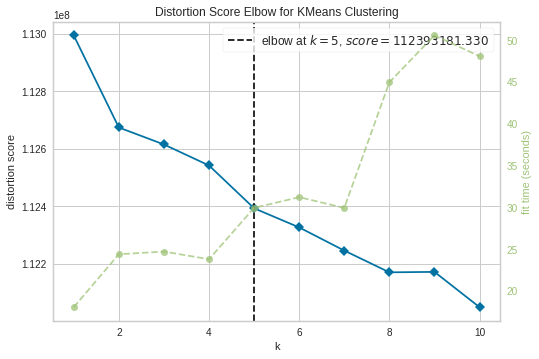

In [22]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure
plt.show()

In [23]:
# instatiate KMeans class and set the number of clusters
km_model = KMeans(n_clusters=5, random_state=10)

# call fit method with data 
km = km_model.fit_predict(X)

# coordinates of cluster center
centroids = km_model.cluster_centers_ 

# cluster label for each data point
labels = km_model.labels_ 

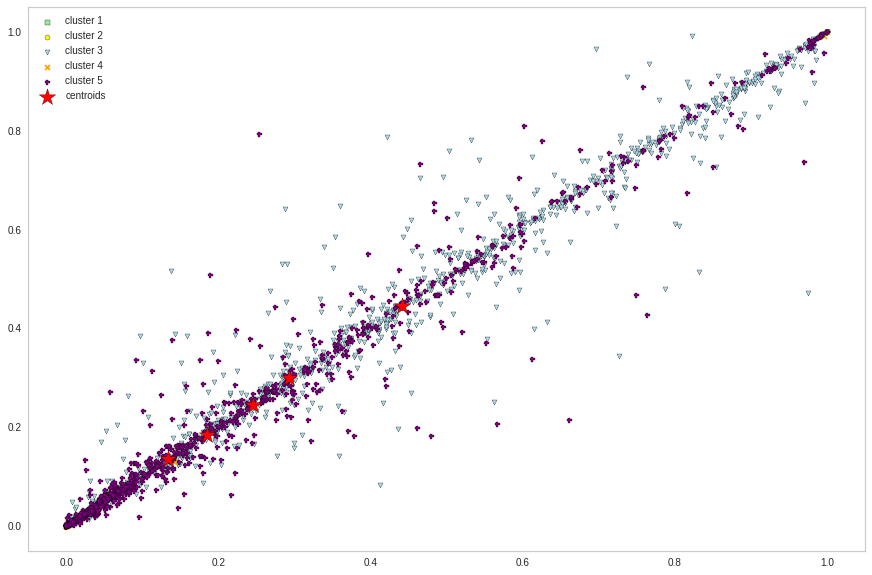

In [34]:
plt.figure(figsize=(15,10))
plt.scatter(
    X[km == 0, 0], X[km == 0, 1],
    s=25, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[km == 1, 0], X[km == 1, 1],
    s=25, c='yellow',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[km == 2, 0], X[km == 2, 1],
    s=25, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    X[km == 3, 0], X[km == 3, 1],
    s=25, c='orange',
    marker='x', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    X[km == 4, 0], X[km == 4, 1],
    s=25, c='purple',
    marker='P', edgecolor='black',
    label='cluster 5'
)

# visualise centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=300, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [35]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_matrix = contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

# Report Purity Score
purity = purity_score(y, labels)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 57.48%


In [36]:
# define dictionary for distance measures
distance_measures = {'euclidean': 0, 'squared euclidean': 1, 'manhattan': 2, 'chebyshev': 3, 
                    'canberra': 5, 'chi-square': 6}

# function defined to compute purity score using pyclustering for various distance measures
def pyPurity(dist_measure):
    initial_centers = random_center_initializer(X, 3, random_state=5).initialize()
    # instance created for respective distance metric
    instanceKm = kmeans(X, initial_centers=initial_centers, metric=distance_metric(dist_measure))
    # perform cluster analysis
    instanceKm.process()
    # cluster analysis results - clusters and centers
    pyClusters = instanceKm.get_clusters()
    pyCenters = instanceKm.get_centers()
    # enumerate encoding type to index labeling to get labels
    pyEncoding = instanceKm.get_cluster_encoding()
    pyEncoder = cluster_encoder(pyEncoding, pyClusters, X)
    pyLabels = pyEncoder.set_encoding(0).get_clusters()
    # function purity score is defined in previous section
    return purity_score(y, pyLabels)

# print results
for measure, value in distance_measures.items():
    print(f"The purity score for {measure} distance is {round(pyPurity(value)*100, 2)}%")

The purity score for euclidean distance is 50.05%
The purity score for squared euclidean distance is 50.05%
The purity score for manhattan distance is 56.51%
The purity score for chebyshev distance is 50.05%
The purity score for canberra distance is 52.34%
The purity score for chi-square distance is 50.31%
